Setup for the simplest gold standard. 3 neurons showing oscillation. Gold dynamics generated not from in-vivo data, but from the model itself.

Using the default neural parameters
Accepted the custom connectivity
All neurons are healthy
Network integration prep completed...
Computing network dynamics...


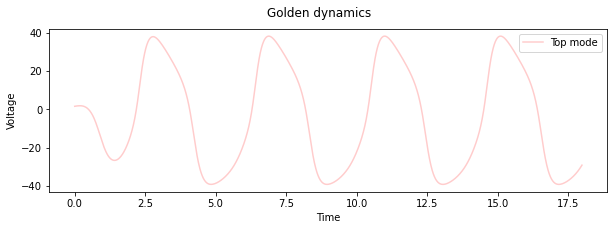

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

default_dir = os.path.dirname(os.getcwd())
os.chdir(default_dir)

from RLConn import network_sim

def plot_top_mode(N, Gg, Gs, is_inhibitory, input_vec):
  # We are not doing any ablation.
  ablation_mask = np.ones(N)
  t_delta = 0.01

  # Run for 10 seconds.
  tf = 20
  cutoff_1 = 100
  cutoff_2 = 1900

  network_dict = {
    "gap" : Gg,
    "syn" : Gs,
    "directionality" : is_inhibitory
  }

  # Initialize model with the network dict

  network_sim.initialize_params_neural()
  network_sim.initialize_connectivity(network_dict)

  # Simulate network with given input_vec and ablation mask

  network_result_dict = network_sim.run_network_constinput_RL(0, tf, t_delta, 
                                                             input_vec=input_vec,
                                                             ablation_mask=ablation_mask,
                                                             verbose=False)
  # Obtain test modes using SVD 
  v_solution_truncated = network_result_dict['v_solution'][100:, :]
  u,s,v = np.linalg.svd(v_solution_truncated.T)
  top_mode = np.dot(v_solution_truncated, u)[cutoff_1:cutoff_2, 0]
  
  num_timesamples = top_mode.shape[0]

  timepoints = np.arange(0, num_timesamples * t_delta, t_delta)
  fig, ax = plt.subplots(figsize=(10, 3))
  ax.plot(timepoints, top_mode, label="Top mode", c ="red", alpha =0.2)
  ax.set_xlabel("Time")
  ax.set_ylabel("Voltage")
  ax.legend()
  fig.suptitle("Golden dynamics")

N = 3
Gg = np.array([[0, 8, 5],
               [8, 0, 2],
               [5, 2, 0]])
Gs = np.array([[0, 2, 8],
               [7, 0, 3],
               [7, 7, 0]])
is_inhibitory = np.array([1, 0 ,0])
input_vec = [0, 0.03 ,0]
plot_top_mode(N, Gg, Gs, is_inhibitory, input_vec)

# Initial Hopf-connectome for N=4

Using the default neural parameters
Accepted the custom connectivity
All neurons are healthy
Network integration prep completed...
Computing network dynamics...


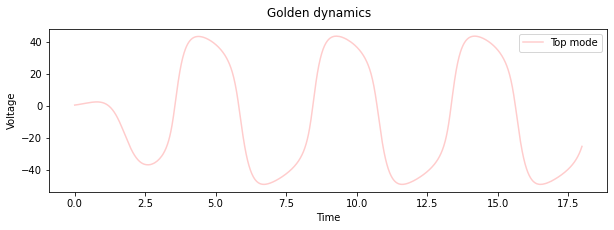

In [25]:
from RLConn import connectome_utils
np.random.seed(10)
N = 4
network = connectome_utils.generate_random_network(N, 1, 10)
Gg = network['gap']
Gs = network['syn']
is_inhibitory = network['directionality'][0]
input_vec = [0.068, 0 ,0, 0]
plot_top_mode(N, Gg, Gs, is_inhibitory, input_vec)

# Initial Hopf-connectome for N=5

Using the default neural parameters
Accepted the custom connectivity
All neurons are healthy
Network integration prep completed...
Computing network dynamics...


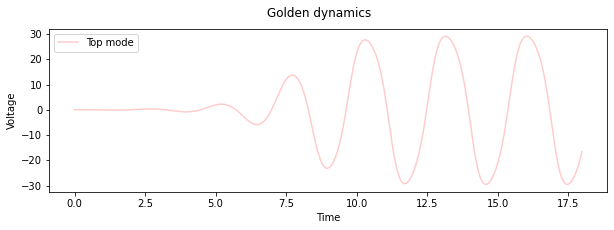

In [26]:
from RLConn import connectome_utils
N = 5
np.random.seed(3)
network = connectome_utils.generate_random_network(N, 1, 10)
Gg = network['gap']
Gs = network['syn']
is_inhibitory = network['directionality'][0]
input_vec = [0.068, 0 ,0, 0, 0]
plot_top_mode(N, Gg, Gs, is_inhibitory, input_vec)